Example of using symbolic manipulation on transfer matrices and imposing achromatic conditions

In [3]:
import numpy as np
from sympy import *
#this statement will render rho and theta as Greek
init_printing()

#Declare symbolic variables, the more information the better.
f1,L1,rho,th = symbols('f1,L1,rho,theta', real=True, positive=True)

Matrix([[1 - (L1 + rho*theta)/f1, L1*(1 - (L1 + rho*theta)/f1) + L1 + rho*theta*(1 - (L1 + rho*theta)/f1) + rho*theta, 0.5*rho*theta**2*(1 - (L1 + rho*theta)/f1) + 0.5*rho*theta**2 + theta*(L1*(1 - (L1 + rho*theta)/f1) + L1 + rho*theta)], [-1/f1, -L1/f1 + 1 - rho*theta/f1, theta*(-L1/f1 + 1) + theta - 0.5*rho*theta**2/f1], [0, 0, 1]])


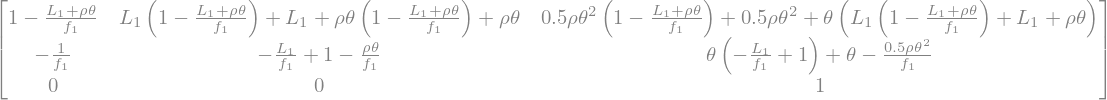

In [4]:
#Dispersion matrices for a quadrupole,drift,dipole are given by
QF = Matrix([[1, 0, 0], [-1/f1, 1, 0], [0, 0, 1]])
O = Matrix([[1, L1, 0], [0, 1, 0], [0, 0, 1]])
#B = Matrix([[cos(th), rho*sin(th), rho*(1-cos(th))], [-sin(th)/rho, cos(th), sin(th)], [0, 0, 1]])
B = Matrix([[1, rho*th, 0.5*rho*(th**2)], [0, 1, th], [0, 0, 1]])

#The simplest possible double-bend achromat cell has the lattice
M=B*O*QF*O*B
print(M)
#when using symbolic variables in a jupyter notebook its often better not to use a print statement
M

In [33]:
#It is only achromatic if we further impose a condition.
#Start with a zero-dispersion vector [D, D', 1] = [0,0,1]
D = Matrix([[0], [0], [1]])
#And after going thought the cell we should end up with a zero-dispersion vector
eq1 = Eq((M*D)[0],0)
eq2 = Eq((M*D)[0],0)
print(eq1)
print(eq2)
#The equations are exactly the same,
#in this case, the only way for D=0 is if D'=0
eq1


Eq(0.5*rho*th**2*(1 - (L1 + rho*th)/f1) + 0.5*rho*th**2 + th*(L1*(1 - (L1 + rho*th)/f1) + L1 + rho*th), 0)
Eq(0.5*rho*th**2*(1 - (L1 + rho*th)/f1) + 0.5*rho*th**2 + th*(L1*(1 - (L1 + rho*th)/f1) + L1 + rho*th), 0)


Eq(0.5*rho*th**2*(1 - (L1 + rho*th)/f1) + 0.5*rho*th**2 + th*(L1*(1 - (L1 + rho*th)/f1) + L1 + rho*th), 0)

In [38]:
#now we solve this one equation for f1
sf = solve(eq1,f1)
print(sf)
#the format is to list the self-consistent solutions, there is only one in this case.
print(sf[0])

print('The solution for f1 is:')
sf[0]

[0.5*L1 + 0.25*rho*th]
0.5*L1 + 0.25*rho*th
The solution for f1 is:


0.5*L1 + 0.25*rho*th